In [2]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data=[]
names = []##col names
total =0
# 開啟 CSV 檔案
with open('claim.csv', newline='') as csv_file:
        df = pd.read_csv(csv_file)
        names = list(df.columns.values)
        df.fillna(0, inplace=True)
    ##處理 ILLNESS_CD 出現0的問題\n",
        df=df[(df[names[4]]!=0)]
        print(names)
    ##total
        for i in df['CASE_NO']:
            total+=1
        print(total)


['CASE_NO', 'INSURED_SEX', 'AGE_RANK', 'TENURE', 'ILLNESS_CD', 'illness_code_desc', 'HOSP_CD', 'hospital_name', 'REIMB_AMT_K', 'settle_dt', 'CountNo', 'REIMB_AMT_5Y_K', 'RECENCY_YEAR', 'CountCovNo', 'Sum_afyp_K', 'EFFECTdate', 'TYPE_CODE', 'AFYP_K']
107599


In [7]:
ILLNESS_CD_CTG = []
ILLNESS_CTG = []

for item in df["ILLNESS_CD"]:
        if item not in ILLNESS_CD_CTG :
            ILLNESS_CD_CTG.append(item)
        
for item in df["illness_code_desc"]:
    if item not in ILLNESS_CTG :
        ILLNESS_CTG.append(item)

print("Num of illness = ")
print(ILLNESS_CTG)
print(len(ILLNESS_CD_CTG))

Num of illness = 
['橈骨骨折', '冠狀動脈疾病', '腦中風', '攝護腺（前列腺）疾病（發炎,肥大等）', '腕及手之脫臼，扭，拉，挫，捩傷', '牙周病', '皮膚良性腫瘤', '糖尿病', '尿道/輸尿管結石', '痔瘡', '直腸息肉/大腸息肉/結腸息肉', '鼻咽癌', '其他骨骼肌肉結締組織疾病', '其他', '胃惡性腫瘤', '大腸/直腸惡性腫瘤', '胃潰瘍', '胰惡性腫瘤', '攝護腺（前列腺）之惡性腫瘤', '腹腔疝氣（腹股溝疝氣及其他）', '腰及背部之脫臼，扭，拉，挫，捩傷', '膀胱惡性腫瘤', '肺炎', '帕金森氏症', '視網膜病變,剝離', '下肢', '肩及上臂之脫臼，扭，拉，挫，捩傷', '踝及足之脫臼，扭，拉，挫，捩傷', '腦及神經系統良性腫瘤', '牙及其支持組織之疾病', '膝及小腿之脫臼，扭，拉，挫，捩傷', '頭部其他部位外傷', '其他耳及乳突之疾病', '足部外傷', '慢性阻塞性肺疾病', '肝癌', '白內障', '消化系統良性腫瘤', '心悸', '其他腦血管疾病', '其他頸椎,脊椎病變', '舌癌', '肺癌', '腎結石', '韌帶損傷,斷裂', '眩暈，頭痛', '腎衰竭', '二尖瓣,三尖瓣疾病（狹窄,閉鎖不全,脫垂）', '肝硬化', '腎臟惡性腫瘤', '肝膿瘍', '掌骨骨折（含指骨）', '股骨頸骨折', '口腔白斑症', '中耳炎及乳突炎', '白血病', '椎間板脫（突）出症,壓迫症(含根神經)', '其他部位外傷', '手之外傷', '骨骼，關節及軟骨之良性腫瘤', '其他腸道惡性腫瘤', '脛骨骨折', '其他部位之脫臼，扭，拉，挫，捩傷', '腦惡性腫瘤', '膽結石', '蹠骨骨折（含趾骨）', '胸部之脫臼，扭，拉，挫，捩傷', '甲狀腺疾患', '腸阻塞（包括扭轉,嵌入）', '鎖骨，肩胛骨骨折', '泌尿道感染', '支氣管肺炎', '黃斑部病變', '肌腱斷裂', '其他內分泌及代謝之疾病', '腹膜炎', '其他部位良性腫瘤', '食道惡性腫瘤', '腎水腫', '靜脈曲張', '肺結核病', '其他消化器及腹膜之惡性腫瘤', '顱內出血', '膝及小腿之外傷', '膽囊炎/膽管炎', '呼吸道及胸腔內器官之良性腫瘤', '肘及前臂之脫臼，扭

In [ ]:
#客戶
tenure = list(df["TENURE"])
tenure_x = ["<5","5~10","10~15","15~20","20~25",">25"]
tenure_count =[0,0,0,0,0,0]

money_spend = list(df["Sum_afyp_K"])##付的保費
money_spend_total = [0,0,0,0,0,0]

money_within_5 = list(df["REIMB_AMT_5Y_K"]) ##理賠金額
money_total = [0,0,0,0,0,0]


for i in range(len(tenure)):

    num = tenure[i]
    dollar_cost =  money_within_5[i]
    dollar_spend = money_spend[i]
    tenure_catg = -1
    if(num<5):
        tenure_catg = 0
    elif(num>=5 and num<10):
        tenure_catg = 1
    elif(num>=10 and num<15):
        tenure_catg = 2
    elif(num>=15 and num<20):
        tenure_catg = 3
    elif(num>=20 and num<25):
        tenure_catg = 4
    elif(num>=25):
        tenure_catg = 5
        
    tenure_count[tenure_catg]+=1
    money_total[tenure_catg] += dollar_cost
    money_spend_total[tenure_catg] += dollar_spend

for i in range(len(tenure_count)):
    money_total[i] = money_total[i]/tenure_count[i]
    money_spend_total[i] = money_spend_total[i]/tenure_count[i]
    

print(money_total)
print(money_spend_total)
    
##客戶年資-人數
nrows = 1
ncols = 2
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(nrows, ncols, 1)
ax.bar(tenure_x,tenure_count)

ax = fig.add_subplot(nrows, ncols, 2)
ax.pie(tenure_count, labels=tenure_x, autopct='%1.1f%%')
##客戶中，以15~20年資最多（26.6%)，其次是20~25年


嗨

([<matplotlib.patches.Wedge at 0x121c164a8>,
 [Text(1.059611768051951, 0.2953352349548198, '<5'),
  Text(0.6565480068659527, 0.8825784467571963, '5~10'),
  Text(-0.2375335065256616, 1.074047407369723, '10~15'),
  Text(-1.0345695196301479, 0.373719024204342, '15~20'),
  Text(-0.7298142801304441, -0.8230255867940448, '20~25'),
  Text(0.7500128487881985, -0.8046618710070779, '>25')],
 [Text(0.5779700553010642, 0.16109194633899257, '8.7%'),
  Text(0.35811709465415603, 0.4814064255039252, '12.3%'),
  Text(-0.12956373083217904, 0.5858440403834851, '15.0%'),
  Text(-0.5643106470709897, 0.2038467404750956, '17.1%'),
  Text(-0.39808051643478765, -0.4489230473422062, '20.9%'),
  Text(0.4090979175208355, -0.4389064750947697, '26.1%')])

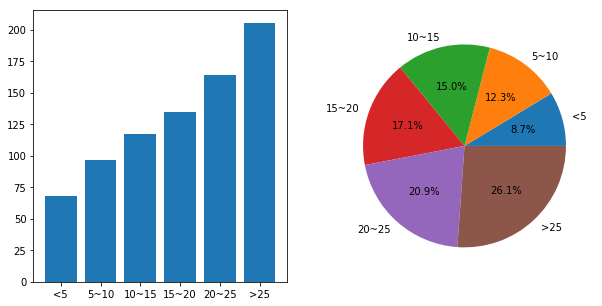

In [85]:
##客戶年資 - 購買保單金額
nrows = 1
ncols = 2
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(nrows, ncols, 1)
ax.bar(xlabel,money_spend_total)
#購賣保單金額，隨著年資增長而提高

ax = fig.add_subplot(nrows, ncols, 2)
ax.pie(money_spend_total, labels=xlabel, autopct='%1.1f%%')
#年資20年以上，佔了保單金額約五成


([<matplotlib.patches.Wedge at 0x11d794a58>,
 [Text(1.0932808048103144, 0.1213963831146189, '<5'),
  Text(0.9154902687989155, 0.6098176512159103, '5~10'),
  Text(0.1012997272753174, 1.0953256891235348, '10~15'),
  Text(-0.991738101169652, 0.4758734481859786, '15~20'),
  Text(-0.6444016401701875, -0.8914855725955256, '20~25'),
  Text(0.8065381845717912, -0.7479947572193535, '>25')],
 [Text(0.5963349844419896, 0.06621620897161029, '3.5%'),
  Text(0.49935832843577205, 0.33262780975413286, '11.7%'),
  Text(0.055254396695627664, 0.5974503758855644, '16.7%'),
  Text(-0.5409480551834465, 0.25956733537417015, '22.0%'),
  Text(-0.3514918037291932, -0.48626485777937756, '22.3%'),
  Text(0.43992991885734056, -0.4079971403014655, '23.8%')])

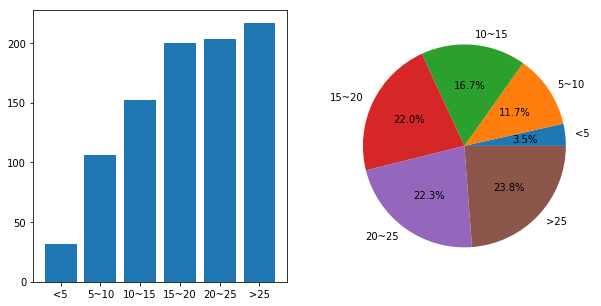

In [79]:

nrows = 1
ncols = 2
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(nrows, ncols, 1)
ax.bar(xlabel,money_total)
#年資越高，五年內平均理賠金額越高   

ax = fig.add_subplot(nrows, ncols, 2)
ax.pie(money_total, labels=xlabel, autopct='%1.1f%%')
#年資15年以上，理賠金額佔百分之七十


